In [ ]:
# All the required packages
!pip install qiskit ipywidgets
import numpy as np
import math
import cmath
!pip install ibm_quantum_widgets
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import *
from numpy.linalg import eig
from math import *
from numpy import *
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi



In [98]:
##Initializing the variables of the rbm
sg= np.ones(2)
a = np.ones(2)
b =  np.ones(2)
c=1
d = np.ones(2)
e=1
f=np.ones(2)
w = np.array([[1,1],[1,1]])
x = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
oldpx = [0,0,0,0]
newIt=1

 

In [99]:
# length units - Angstrom
a1 = array([2.55*sqrt(3)/2,2.55/2])
a2 = array([2.55*sqrt(3)/2,-2.55/2])
#Energy units-eV
tc = 1.994
t1 = 2.86
t2 = -0.236
t3 = 0.252
U=9.3

In [100]:
def H1(K):
    return t1*(1+exp(dot(K,a1)*1j)+exp(dot(K,a2)*1j))
def H2(K):
    return t2*(exp(dot(K,a1)*1j)+exp(dot(K,a2)*1j) + exp(dot(K,-a2)*1j)+exp(dot(K,-a1)*1j) +exp(dot(K,a2-a1)*1j) +exp(dot(K,a1-a2)*1j))
def H3(K):
    return t3*(exp(dot(K,a2-a1)*1j) +exp(dot(K,a1-a2)*1j) + exp(dot(K,a1+a2)*1j))
def H(K):
    return np.array([[tc + H2(K),0,0,H1(K)+H3(K)],[0,tc+H2(K)+U,H1(K)+H3(K),0],[0,conj(H1(K))+conj(H3(K)),tc+H2(K)+U,0],[conj(H1(K))+conj(H3(K)),0,0,tc+H2(K)]])


In [164]:
#H([1,0])
#H([1,0])[0,0]
#eig(H([2*pi/(3*2.55),2*pi/(3*2.55)*sqrt(3)]))
KK=[2*pi/(3*2.55),2*pi/(3*2.55)*1/sqrt(3)] # -2 missing here
M=[2*pi/(3*2.55),0]    #and 0 missing here
#K= [2*pi,2*pi*tan(30*(2*pi)/360)]
Gamma=[0,0]  # all good 0.5 maybe off
koko=[pi/(3*2.55),pi/(3*2.55)*1/sqrt(3)]
eig(H(KK))[0]


array([ 6.77160654+4.24105195e-17j, -2.74380769+4.24105195e-17j,
       16.07160654-3.03757020e-16j,  6.55619231-3.03757020e-16j])

In [102]:
#Hamiltonian definition
def A(sg1,sg2):
 k = np.array(K)
 sg1=np.array(sg1)
 sg2=np.array(sg2)
 i=0
 j=0
 if (sg1==[1,1]).all():
    i=0
 elif (sg1==[1,-1]).all():
    i=1
 elif (sg1==[-1,1]).all():
    i=2
 elif (sg1==[-1,-1]).all():
    i=3
    
 if (sg2==[1,1]).all():
    j=0
 elif (sg2==[1,-1]).all():
    j=1
 elif (sg2==[-1,1]).all():
    j=2
 elif (sg2==[-1,-1]).all():
    j=3
 return H(k)[i,j]
#print(A([1,1],[1,1]))

(0.5780000000000001+0j)


In [103]:
#Quantum computer

def px(sg,a,b,c,d,e,f,w): # test P(X)
  # Assigning qubit rotation angles using the above parameters
 global newIt
 global oldpx

 if newIt == 0:
   if(sg == [1,1]).all():
    return oldpx[0] 

   if(sg == [-1,1]).all():
    return oldpx[1] 

   if(sg == [1,-1]).all():
    return oldpx[2] 

   if(sg == [-1,-1]).all():
    return oldpx[3] 
 #print("Quantum Computer is used")
 theta =[0,0];
 gamma =[0,0];

 theta[0] = (2*asin(sqrt(exp(a[0])/(exp(a[0]) + exp(-a[0]))))).real;
 theta[1] = (2*asin(sqrt(exp(a[1])/(exp(a[1]) + exp(-a[1]))))).real;


 gamma[0] = (2*asin(sqrt(exp(b[0])/(exp(b[0]) + exp(-b[0]))))).real;
 gamma[1] = (2*asin(sqrt(exp(b[1])/(exp(b[1]) + exp(-b[1]))))).real;

 THETA = [(2*asin(sqrt(exp(w[0,0])/(exp(abs(w[0,0])))))).real, (2*asin(sqrt(exp(w[0,1])/(exp(abs(w[0,1])))))).real,(2*asin(sqrt(exp(w[1,0])/(exp(abs(w[1,0])))))).real,(2*asin(sqrt(exp(w[1,1])/(exp(abs(w[1,1])))))).real];

 THETAN = [(2*asin(sqrt(exp(-w[0,0])/(exp(abs(w[0,0])))))).real, (2*asin(sqrt(exp(-w[0,1])/(exp(abs(w[0,1])))))).real,(2*asin(sqrt(exp(-w[1,0])/(exp(abs(w[1,0])))))).real,(2*asin(sqrt(exp(-w[1,1])/(exp(abs(w[1,1])))))).real];

#initialising ccry gate 0
 qreg = QuantumRegister(3, 'q')
 ccry = QuantumCircuit(qreg)

 ccry.cry(THETA[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[0] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETAN[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[0] / 2, qreg[0], qreg[2])

 ccry.x(0)
 ccry.x(1)


 ccry.cry(THETAN[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[0] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETA[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[0] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[0] / 2, qreg[0], qreg[2])

 CCRY0 = ccry.to_instruction()

#initialising ccry gate 1
 qreg = QuantumRegister(3, 'q')
 ccry = QuantumCircuit(qreg)

 ccry.cry(THETA[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[1] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETAN[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[1] / 2, qreg[0], qreg[2])

 ccry.x(0)
 ccry.x(1)


 ccry.cry(THETAN[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[1] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETA[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[1] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[1] / 2, qreg[0], qreg[2])

 CCRY1 = ccry.to_instruction()

#initialising ccry gate 2
 qreg = QuantumRegister(3, 'q')
 ccry = QuantumCircuit(qreg)

 ccry.cry(THETA[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[2] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETAN[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[2] / 2, qreg[0], qreg[2])

 ccry.x(0)
 ccry.x(1)


 ccry.cry(THETAN[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[2] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETA[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[2] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[2] / 2, qreg[0], qreg[2])

 CCRY2 = ccry.to_instruction()

#initialising ccry gate 3
 qreg = QuantumRegister(3, 'q')
 ccry = QuantumCircuit(qreg)

 ccry.cry(THETA[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[3] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETAN[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[3] / 2, qreg[0], qreg[2])

 ccry.x(0)
 ccry.x(1)


 ccry.cry(THETAN[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETAN[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETAN[3] / 2, qreg[0], qreg[2])

 ccry.x(0)

 ccry.cry(THETA[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(-THETA[3] / 2, qreg[1], qreg[2])
 ccry.cx(qreg[0], qreg[1])
 ccry.cry(THETA[3] / 2, qreg[0], qreg[2])

 CCRY3 = ccry.to_instruction()

# The actual circuit(4 visible units + 4 hidden units)
 qreg_q = QuantumRegister(8, 'q')
 creg_c = ClassicalRegister(8, 'c')
 circuit = QuantumCircuit(qreg_q, creg_c)

 circuit.ry(theta[0], qreg_q[0])
 circuit.ry(theta[1], qreg_q[1])
 circuit.ry(gamma[0], qreg_q[2])
 circuit.ry(gamma[1], qreg_q[3])

# Circuit barrier

 circuit.barrier(qreg_q[0])
 circuit.barrier(qreg_q[1])
 circuit.barrier(qreg_q[2])
 circuit.barrier(qreg_q[3])
 circuit.barrier(qreg_q[4])
 circuit.barrier(qreg_q[5])
 circuit.barrier(qreg_q[6])
 circuit.barrier(qreg_q[7])

#Appending ccry gates (update it after talking to Manas

 circuit.append(CCRY0, [0,2,4]);
 circuit.append(CCRY1, [0,3,5]);
 circuit.append(CCRY2, [1,2,6]);
 circuit.append(CCRY3, [1,3,7]);

# Measurements
 circuit.measure(qreg_q[0], creg_c[0])
 circuit.measure(qreg_q[1], creg_c[1])
 circuit.measure(qreg_q[2], creg_c[2])
 circuit.measure(qreg_q[3], creg_c[3])
 circuit.measure(qreg_q[4], creg_c[4])
 circuit.measure(qreg_q[5], creg_c[5])
 circuit.measure(qreg_q[6], creg_c[6])
 circuit.measure(qreg_q[7], creg_c[7])


# Transpile for simulator
 simulator = Aer.get_backend('aer_simulator')
 circ = transpile(circuit, simulator)

# Run and get counts
 num_of_shots = 1000;
 result = simulator.run(circ, shots=num_of_shots).result()
 counts = result.get_counts(circ)

 P = {'00':0,'01':0,'10':0,'11':0}

 for i in P:
    for j in counts:
        if (j[0:4] == '1111' and j[6:8] == i):
            P[i] = P[i] + counts[j]/num_of_shots;
 oldpx[0] =  P['00']
 oldpx[1] =  P['10']
 oldpx[2] =  P['01']
 oldpx[3] =  P['11']    
 newIt = 0
 if(sg == [1,1]).all():
    
    return P['00']

 if(sg == [-1,1]).all():
    return P['10']

 if(sg == [1,-1]).all():
    return P['01']

 if(sg == [-1,-1]).all():
    return P['11']


In [104]:
def sx(sg,a,b,c,d,e,f,w):  ## S(x), i,j runs from 1 to 2
  term1= c+np.einsum('i,i->', d, sg) 
  term2 =(e+np.einsum('i,i', f, sg))*1j
  return cmath.tanh(term1+term2)
####

In [105]:
def Bxa(sg,a,b,c,d,e,f,w): #B(x;a_i)
  return 0.5*sg

In [106]:
def Bxb (sg,a,b,c,d,e,f,w):
  return 0.5*np.array(list(map(cmath.tanh, b+ np.einsum('ij,i->j', w, sg))))

def Bxc (sg,a,b,c,d,e,f,w):
  return (1/(( sx(sg,a,b,c,d,e,f,w)))- sx(sg,a,b,c,d,e,f,w))

def Bxd (sg,a,b,c,d,e,f,w):
  return  (1/( sx(sg,a,b,c,d,e,f,w))- sx(sg,a,b,c,d,e,f,w))*sg

def Bxe (sg,a,b,c,d,e,f,w):
  return (1/( sx(sg,a,b,c,d,e,f,w))- sx(sg,a,b,c,d,e,f,w))*1j

def Bxf (sg,a,b,c,d,e,f,w):
  return (1/( sx(sg,a,b,c,d,e,f,w))- sx(sg,a,b,c,d,e,f,w))*1j*sg

def Bxw (sg,a,b,c,d,e,f,w):
  term1 = 0.5*np.array(list(map(cmath.tanh, b+np.einsum('ij,i->j', w, sg))))
  term2 = sg
  return np.einsum('j,i->ij',term1,term2)

In [107]:
 for l in range(3):
  print(l)

0
1
2


In [108]:
def Avx(Bxi,sg,a,b,c,d,e,f,w): #<B(x;p_k)>_x  
  denom=0+0*1j
  for i in range(x.shape[0]):
    denom+= abs(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))**2
####
  
  if Bxi == Bxc or Bxi == Bxe :
   numer=0+0*1j
   for i in range(x.shape[0]):
      t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
      t2= Bxi(x[i],a,b,c,d,e,f,w)
      t3= cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w)
      numer+=t1*t2*t3
   return (numer)/(denom.real)
  elif Bxi == Bxw:
     numer2=np.zeros((w.shape[0],w.shape[0]),dtype = 'complex_')
     for l in range(a.shape[0]): 
       for k in range(a.shape[0]):
         numerkl=0 +0*1j ### review
         for i in range(x.shape[0]):
            t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
            t2= Bxi(x[i],a,b,c,d,e,f,w)[k][l]
            t3= cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w)
            numerkl+=t1*t2*t3
         numer2[k][l]=numerkl
     return (numer2)/(denom.real)
  else:
     numer3=np.zeros(a.shape[0],dtype = 'complex_')
     for k in range(a.shape[0]):
       numerk=0+0*1j
       for i in range(x.shape[0]):
         t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
         t2= Bxi(x[i],a,b,c,d,e,f,w)[k]
         t3= cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w)
         numerk+=t1*t2*t3
       numer3[k]=numerk
     return (numer3)/(denom.real)    
#################

#print( Avx(Bxe,sg,a,b,c,d,e,f,w))

In [109]:
def Avxx(Bxi,sg,a,b,c,d,e,f,w): #_x',x  #Done
  denom=0
  for i in range(x.shape[0]):
    denom+= abs(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*(sx(x[i],a,b,c,d,e,f,w)))**2
####
  
  if Bxi == Bxc or Bxi == Bxe :
   numer=0+0*1j
   for i in range(x.shape[0]):
    for j in range(x.shape[0]):
      t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
      t2= A(x[i],x[j])*Bxi(x[j],a,b,c,d,e,f,w)
      t3= cmath.sqrt(px(x[j],a,b,c,d,e,f,w))*sx(x[j],a,b,c,d,e,f,w)
      numer+=t1*t2*t3
   return (numer)/(denom.real)
  elif Bxi == Bxw:
     numer=np.zeros((w.shape[0],w.shape[0]),dtype = 'complex_')
     for k in range(a.shape[0]):
       for l in range(a.shape[0]):
         numerkl=0+0*1j
         for i in range(x.shape[0]):
           for j in range(x.shape[0]):
            t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
            t2= A(x[i],x[j])*Bxi(x[j],a,b,c,d,e,f,w)[k][l]
            t3= cmath.sqrt(px(x[j],a,b,c,d,e,f,w))*sx(x[j],a,b,c,d,e,f,w)
            numerkl+=t1*t2*t3
         numer[k][l]=numerkl

     
     return (numer)/(denom.real)
  else:
     numer=np.zeros(a.shape[0],dtype = 'complex_')
     for k in range(a.shape[0]):
       numerk=0+0*1j
       for i in range(x.shape[0]):
         for j in range(x.shape[0]):
          t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
          t2= A(x[i],x[j])*Bxi(x[j],a,b,c,d,e,f,w)[k]
          t3= cmath.sqrt(px(x[j],a,b,c,d,e,f,w))*sx(x[j],a,b,c,d,e,f,w)
          numerk+=t1*t2*t3
       numer[k]=numerk
     return (numer)/(denom.real)    


In [110]:
def AvA (sg,a,b,c,d,e,f,w):  # doesn't depend on sg actually #Done
  numer=0+0*1j
  for i in range(x.shape[0]):
    for j in range(x.shape[0]):
      t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
      t2= A(x[i],x[j])
      t3= cmath.sqrt(px(x[j],a,b,c,d,e,f,w))*sx(x[j],a,b,c,d,e,f,w)
      numer+=t1*t2*t3
  denom=0+0*1j
  for i in range(x.shape[0]):
    denom+= abs(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*((sx(x[i],a,b,c,d,e,f,w))))**2
  return (numer)/(denom)

def AvAp (params):
  a  =  np.array(params[0:2])
  b  =  np.array(params[2:4])
  c  =  np.array(params[4])
  d  =  np.array(params[5:7])
  e  =  np.array(params[7])
  f  =  np.array(params[8:10])
  w  =  np.array(np.resize(params[10:14],(2,2)))
  numer=0+0*1j
  for i in range(x.shape[0]):
    for j in range(x.shape[0]):
      t1= np.conj(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
      t2= A(x[i],x[j])
      t3= cmath.sqrt(px(x[j],a,b,c,d,e,f,w))*sx(x[j],a,b,c,d,e,f,w)
      numer+=t1*t2*t3
  denom=0+0*1j
  for i in range(x.shape[0]):
    denom+= abs(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*((sx(x[i],a,b,c,d,e,f,w))))**2
  return (numer)/(denom)

In [111]:
def partialAx(Bxi,sg,a,b,c,d,e,f,w): #partial/partial x_k
  term1 = Avxx(Bxi,sg,a,b,c,d,e,f,w) 
  if Bxi == Bxc or Bxi == Bxe:
    term2 = term1+np.conjugate(term1)
  else:
    term2 = term1 + np.array(list(map(np.conj, term1)))
  term3 = Avx(Bxi,sg,a,b,c,d,e,f,w) 
  if Bxi == Bxc or Bxi == Bxe:
    term4 = AvA(sg,a,b,c,d,e,f,w)*(term3+ np.conjugate(term3))
  else:
    term4 = AvA(sg,a,b,c,d,e,f,w)*(term3+ np.array(list(map(np.conj, term3)))) 
  return (term2+term4)



In [112]:
##Checking the wave function shape
def getPhi(params):
  a  =  np.array(params[0:2])
  b  =  np.array(params[2:4])
  c  =  np.array(params[4])
  d  =  np.array(params[5:7])
  e  =  np.array(params[7])
  f  =  np.array(params[8:10])
  w  =  np.array(np.resize(params[10:14],(2,2)))
  norm=0
  norm2=0
  global newIt
  phi=np.zeros(4,dtype = 'complex_')
  for i in range(x.shape[0]):
    newIt=1
    phi[i]=(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))
    norm+=abs(cmath.sqrt(px(x[i],a,b,c,d,e,f,w))*sx(x[i],a,b,c,d,e,f,w))**2
  phi=phi/math.sqrt(norm)
  for i in range(phi.shape[0]):
    norm2+=abs(phi[i])**2
  if abs(norm2-1)>0.1:
    return -1
  else:
    return phi


In [113]:
def grad(params): # vectorial gradient
  global newIt
  a  =  np.array(params[0:2])
  b  =  np.array(params[2:4])
  c  =  np.array(params[4])
  d  =  np.array(params[5:7])
  e  =  np.array(params[7])
  f  =  np.array(params[8:10])
  w  =  np.array(np.resize(params[10:14],(2,2))) #
  newIt = 1
  term1=np.append(np.concatenate((partialAx(Bxa,sg,a,b,c,d,e,f,w),partialAx(Bxb,sg,a,b,c,d,e,f,w))),partialAx(Bxc,sg,a,b,c,d,e,f,w)) 
  term2 = np.append(term1,partialAx(Bxd,sg,a,b,c,d,e,f,w))
  term3= np.append(term2,partialAx(Bxe,sg,a,b,c,d,e,f,w))
  term4 = np.append(term3,partialAx(Bxf,sg,a,b,c,d,e,f,w))
  paramsgrad = np.append(term4,partialAx(Bxw,sg,a,b,c,d,e,f,w))
 
  return paramsgrad.real


In [114]:
def gd(grad, sg,a,b,c,d,e,f,w, n_epochs=10, eta=0.001):  #Gradient descent
    #We can here use Adam instead of this very simple descent
    
    term1=np.append(np.concatenate((a,b)),c) 
    term2 = np.append(term1,d)
    term3=np.append(term2,e)
    term4 = np.append(term3,f)
    params = np.append(term4,w)
    param_traj=np.zeros([n_epochs+1,params.shape[0]],dtype = 'complex_')
    param_traj[0,]=params
    v=0;
   
    for j in range(n_epochs):
         v=eta*(np.array(grad(params)[0]))
         params=params-v
         param_traj[j+1,]=params
    return  params,param_traj

In [120]:
 
import warnings
import matplotlib.pyplot as plt



warnings.simplefilter('ignore')
N=20

GD= gd(grad, sg,a,b,c,d,e,f,w, n_epochs=N, eta=0.01)
En = np.zeros(GD[1].shape[0])
for i in range(N+1):
  En[i]=AvAp(GD[1][i])

t = np.arange(0,N+1, 1)
 
plt.plot(t, En)
plt.show()
print(GD[0])
warnings.simplefilter('once')


ValueError: ignored

In [116]:
## checking consistency of p(x)
params = np.array([-4.90871201, -3.94664906,  2.69956987, -1.7012768, -5.   , 1.64777324,
  0.05742938, -3.86198992, -3.58386635 ,-0.98571219,  1.19666579, -3.17488808,
  0.43581144 , 3.49859982])
print(getPhi(params))


[-0.99999684+0.00251514j  0.        -0.j          0.        -0.j
  0.        +0.j        ]


In [117]:
K=Gamma
AvAp(([-0.20880033, -0.67927266  ,1.53638286 ,-0.13445333 -1.   ,       0.30143735,
  1.90830312, -0.67785334  ,0.38921344 , 0.97363198 , 1.74683136 ,-0.51135974,
 -1.78990381 ,-0.00897839]))

(0.5780000000000002+0j)

0.4039544399812653
<class 'numpy.ndarray'>
Done!


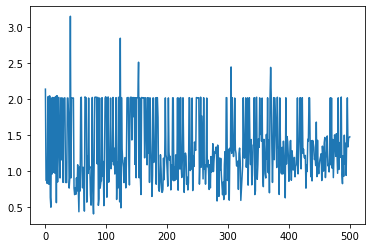

In [166]:
# Using Adam instead of Gradient descent
K = KK
def objective(params):

  a  =  np.array(params[0:2])
  sg = a
  b  =  np.array(params[2:4])
  c  =  np.array(params[4])
  d  =  np.array(params[5:7])
  e  =  np.array(params[7])
  f  =  np.array(params[8:10])
  w  =  np.array(np.resize(params[10:14],(2,2)))
  return AvA (sg,a,b,c,d,e,f,w).real
 
# derivative of objective function
def derivative(params):
	return grad(params) ###RRR
 
# gradient descent algorithm with adam
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
  
	# generate an initial point
	params = np.array([ 0.5517925 ,  1.66022419 ,-1.71563941 , 1.84781715 , 1.01328545 ,-1.89106584,
 -2.80770268 , 0.23243057,  1.89385817  ,1.55012302 , 1.06453638 , 0.34460442,
 -2.31277239 ,-0.47945835])

	# initialize first and second moments
	m = [0.0 for _ in range(bounds.shape[0])]
	v = [0.0 for _ in range(bounds.shape[0])]
	paramtraj=np.zeros((n_iter+1,params.shape[0]))
	paramtraj[0]=params
	# run the gradient descent updates
	score = np.zeros(n_iter+1)
	score[0] = objective(params)  ####RRR
	for t in range(n_iter):
		# calculate gradient g(t)
		g = derivative(params)  #######RRRR
		# build a solution one variable at a time
		for i in range(params.shape[0]):
			# m(t) = beta1 * m(t-1) + (1 - beta1) * g(t)
			m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]  #
			# v(t) = beta2 * v(t-1) + (1 - beta2) * g(t)^2
			v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
			# mhat(t) = m(t) / (1 - beta1(t))
			mhat = m[i] / (1.0 - beta1**(t+1))
			# vhat(t) = v(t) / (1 - beta2(t))
			vhat = v[i] / (1.0 - beta2**(t+1))
			# x(t) = x(t-1) - alpha * mhat(t) / (sqrt(vhat(t)) + eps)
			params[i] = params[i] - alpha * mhat / (sqrt(vhat) + eps)
	    


		# evaluate candidate point
		score[t+1] = objective(params)  ######3RRRR
		paramtraj[t]=params
		# report progress
		#print('>%d f(%s) = %.5f' % (t, x, score))
	return paramtraj, score
 
# define range for input
r=5
l=-5
bounds = np.array([[l, r],[l, r],[l, r],[l, r],[l, r]
                   ,[l, r],[l, r],[l, r],[l, r],[l, r]
									 ,[l, r],[l, r],[l, r],[l, r]])
# define the total iterations
n_iter = 500
# steps size
eta = 0.001
# factor for average gradient
beta1 = 0.999
# factor for average squared gradient
beta2 = 0.9
# perform the gradient descent search with adam
GD = adam(objective, derivative, bounds, n_iter, eta, beta1, beta2)
#best = GD[0].index(np.min(GD[1]))
#minE = GD[1].index(np.min(GD[1]))
print(np.min(GD[1]))

print(type(GD[1]))
print('Done!')
#print('f(%s) = %f' % (best, minE))
#print(getPhi(best))


 
 
plt.plot(GD[1])
plt.show()

In [167]:
print(np.argmin(GD[1])) 
print(GD[0][np.argmin(GD[1])])
print(GD[1][np.argmin(GD[1])])

79
[ 0.47533461  1.58272078 -1.63900963  1.77192324  0.96172206 -1.83641699
 -2.86152048  0.29116664  1.83272364  1.60495546  1.14140651  2.2685238
 -2.23628248 -0.55603557]
0.4039544399812653


In [169]:
#Random search for good initial conditions
K=KK
k=2
l=2
min=10
for i in range(200):
  sg= np.ones(2)

  a = np.array([ random.random()*2*k-l,random.random()*2*k-l])
  b =  np.array( [random.random()*2*k-l,random.random()*2*k-l])
  c=random.randint(-8,8)
  d = np.array([ random.random()*2*k-l,random.random()*2*k-l])
  e=random.random()*2*k-l
  f= [random.random()*2*k-l,random.random()*2*k-l]
  w = np.array([[random.random()*2*k-l,random.random()*2*k-l],[ random.random()*2*k-l,random.random()*2*k-l]])
  newIt=1
  #print(AvA(sg,a,b,c,d,e,f,w))
  
  if AvA(sg,a,b,c,d,e,f,w)<min:
    min = AvA(sg,a,b,c,d,e,f,w)
    term1=np.append(np.concatenate((a,b)),c) 
    term2 = np.append(term1,d)
    term3=np.append(term2,e)
    term4 = np.append(term3,f)
    opt = np.append(term4,w)
  if min < -2:
    break
print("    ")
print(opt,min)

    
[ 1.69375497  1.79394681  0.89622898 -1.02928244  0.         -1.47283807
  1.06359361  0.59484268 -0.62972443 -1.19099808 -1.1264623   1.65725401
  1.99164701 -0.24768984] (0.5116763253347983-9.941496428839432e-17j)
